# Project 2  Bipartite Network

## By Team Vac

### Introduction

Let's explore a bipartite network, or commonly referred as a two mode network. First, a Bipartite network is one where there are at least two types of nodes where their connections are based on the primary node connection. In short, nodes of one set can only be transverse if they share the same connection to a node of the other set. 

We selected Pajek's Divorce Network for our analysis. For some background, Pajek's divorce network is made up state node set and a reason node set. The state nodes are comprise of US's 50 states and the law nodes are the divorce laws supported based on the reasons for seperation. Their connection represent if the US state has a the specific divorce law in placed based on the reason of seperation. In order to use this dataset, there was translation from the .net file into a .edgelist viewed [here](https://github.com/Vy4thewin/Data620_TeamVAC/blob/main/generate_edgelist.py). After the .edgelist tranformation, we can import the 2 mode network with the bipartite function. Let's view how the network looks below!

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from networkx.algorithms import bipartite

#Loading in the divorce network
divorce=bipartite.read_edgelist("divorce.edgelist",delimiter=",",nodetype=str)

#Seperating the two node sets into their groupings
states, causes = bipartite.sets(divorce)

#Lets check that the two sets were seperated correctly
list(states)
list(causes)

['separate',
 'alcohol',
 'felony',
 'nonsupp',
 'cruelty',
 'insanity',
 'desertn',
 'impotenc',
 'incompat']

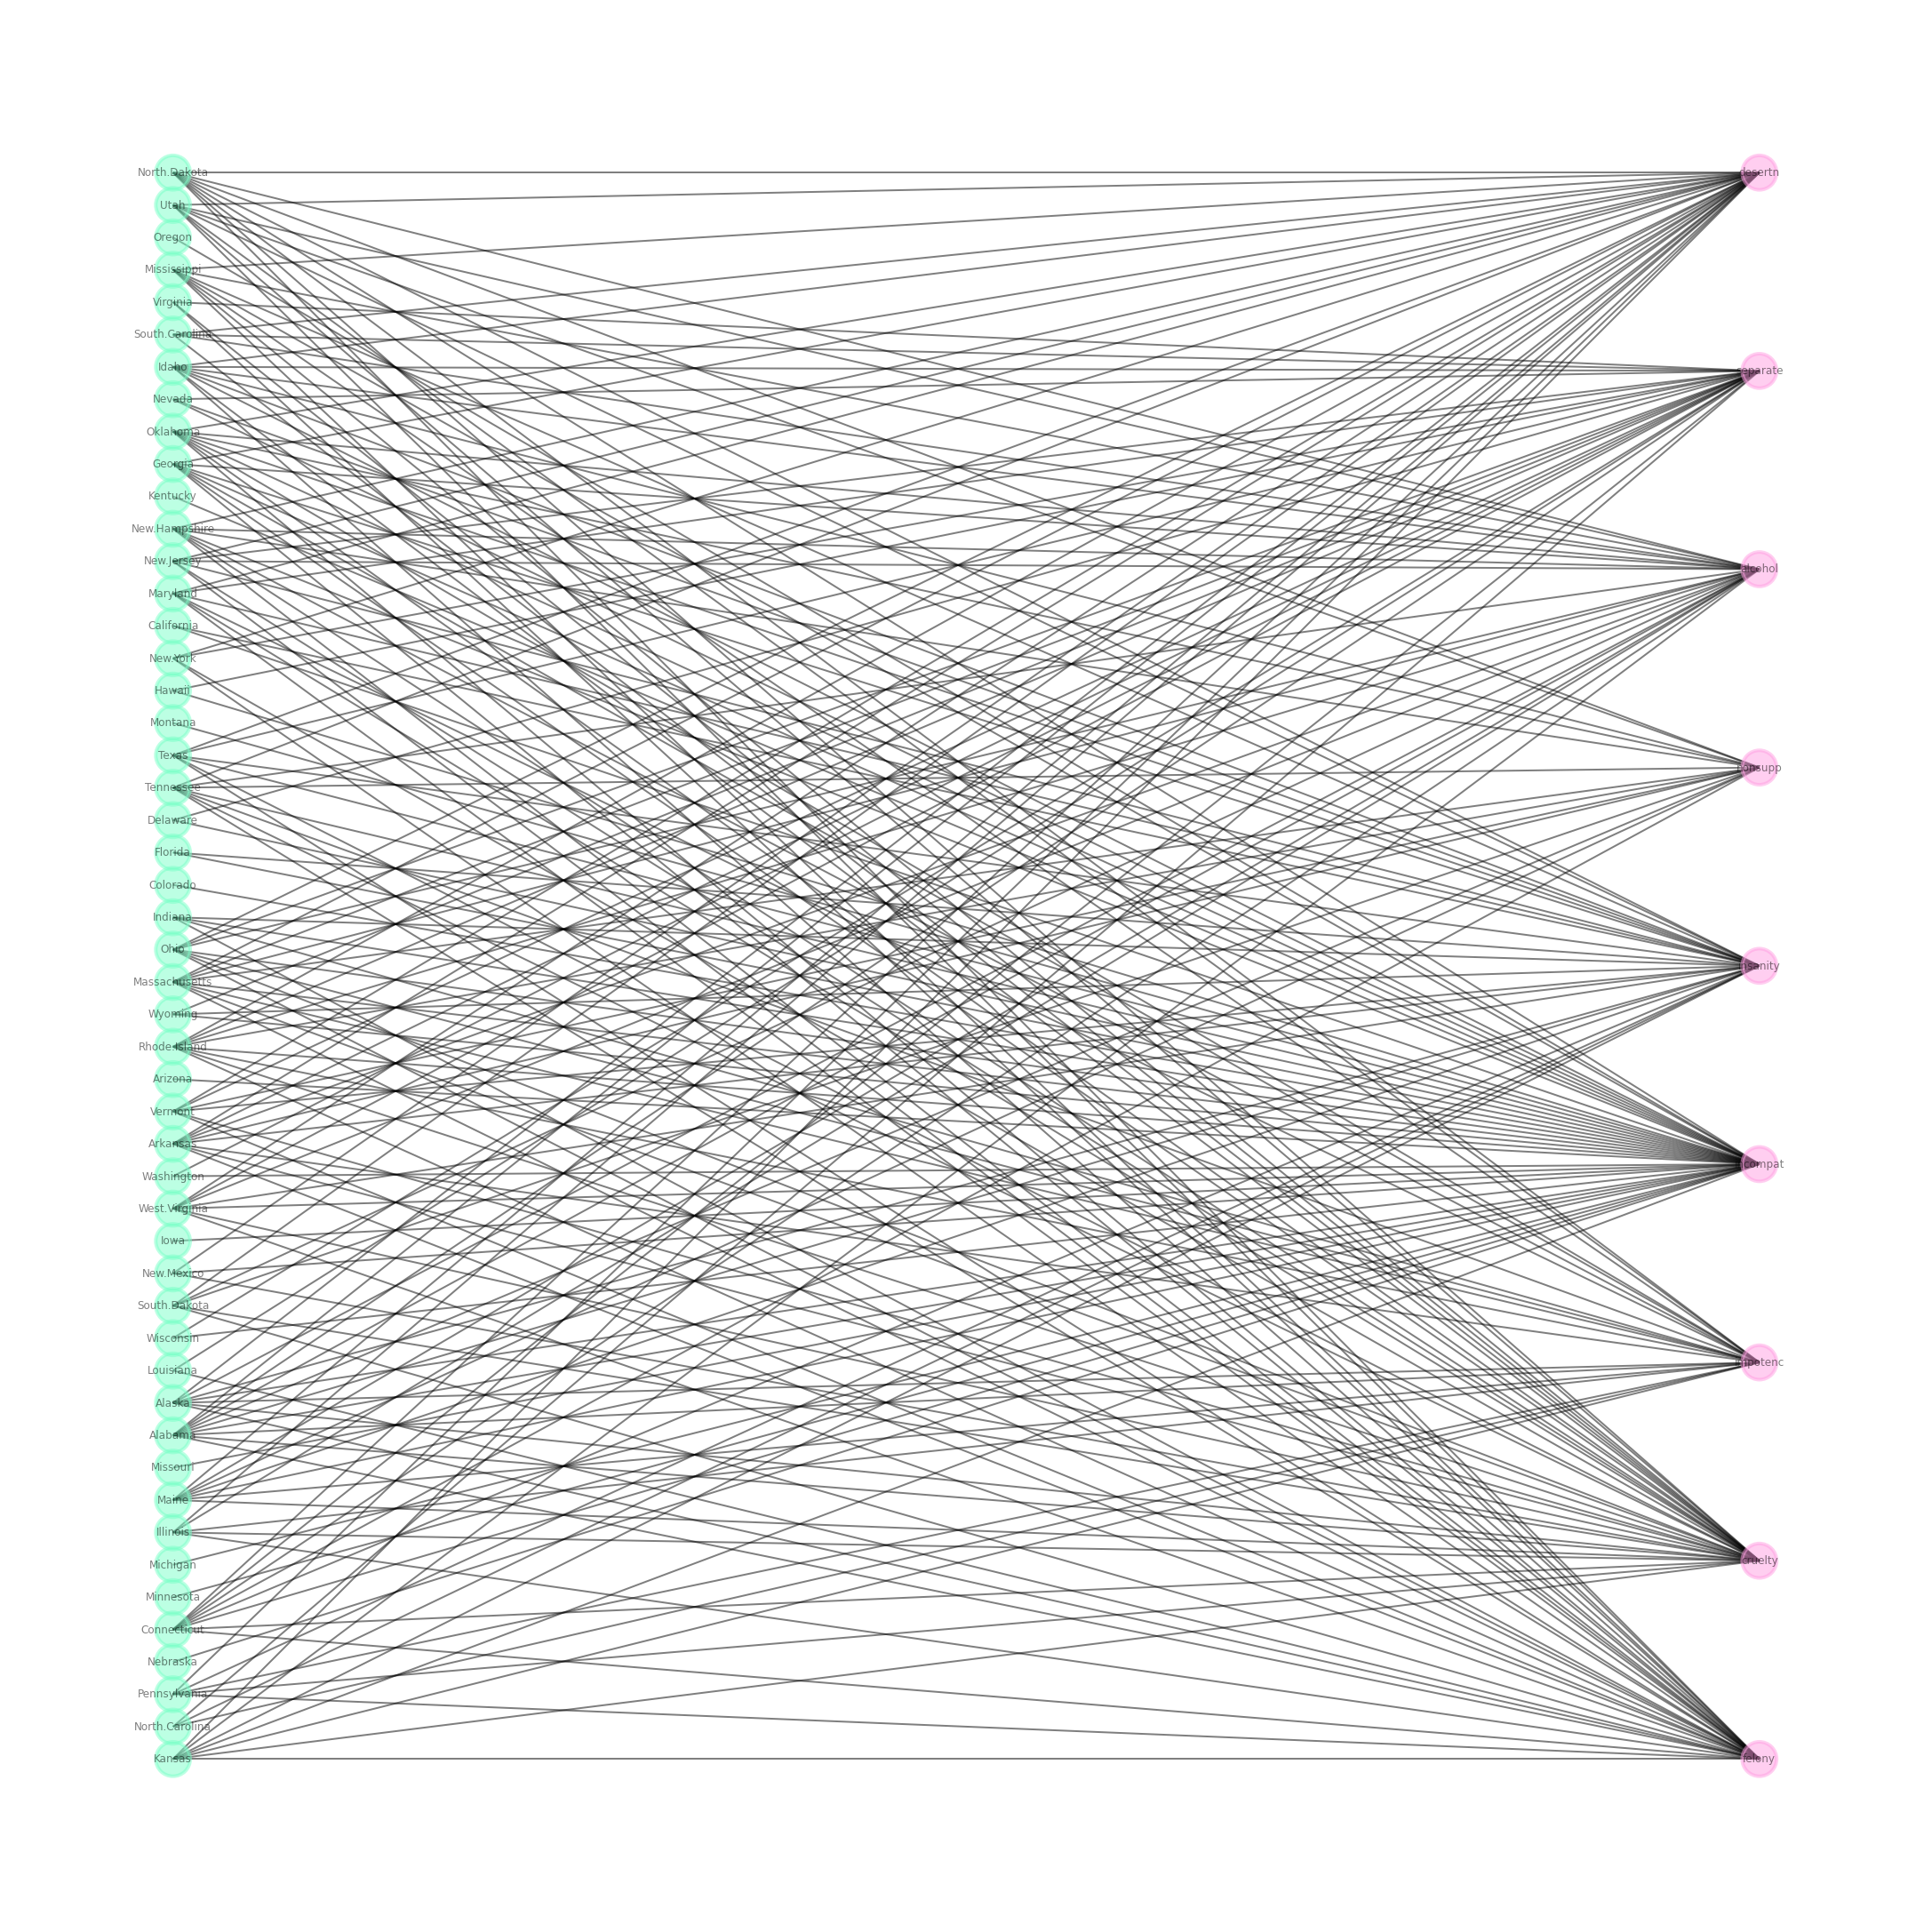

In [15]:
#Lets see what the system grabbed as the node set for reference
values=bipartite.color(divorce)

#States received set 1 and legal causes were set 2
nodes_family={0:'#7affc8',1:'#ff9ee2'}
nodes_colors=[nodes_family[i[1]] for i in divorce.nodes.data('bipartite')]

#Lets create a visual of the network
pos=nx.bipartite_layout(divorce,states)
plt.figure(figsize=(30, 30))
nx.draw(divorce,with_labels=True,node_size=1500,node_shape="o" ,alpha=0.5 ,linewidths=4, width=2,node_color=nodes_colors,pos=pos)
plt.show()


### Limiting down the network scope

From our original pull, the network has a lot of connections and will make it a diffcult process to see the largest majority in law legal cause for a seperation. In order to shrink down our scope, we decided to choose the most connected cause of the graph.

We can see below that the first strongest causes based on its centrality degree is incompatibility. Let's create a subgraph to see the edges formed by the incompatibility cause in divorce; we can use the ego graph function by Netowrkx to reduce the original network for only connected based on a certain node. For our distance of the graph, we can see the scope for all connections with a radius of three away from the base node for a view on clusters.

('incompat', 0.74)


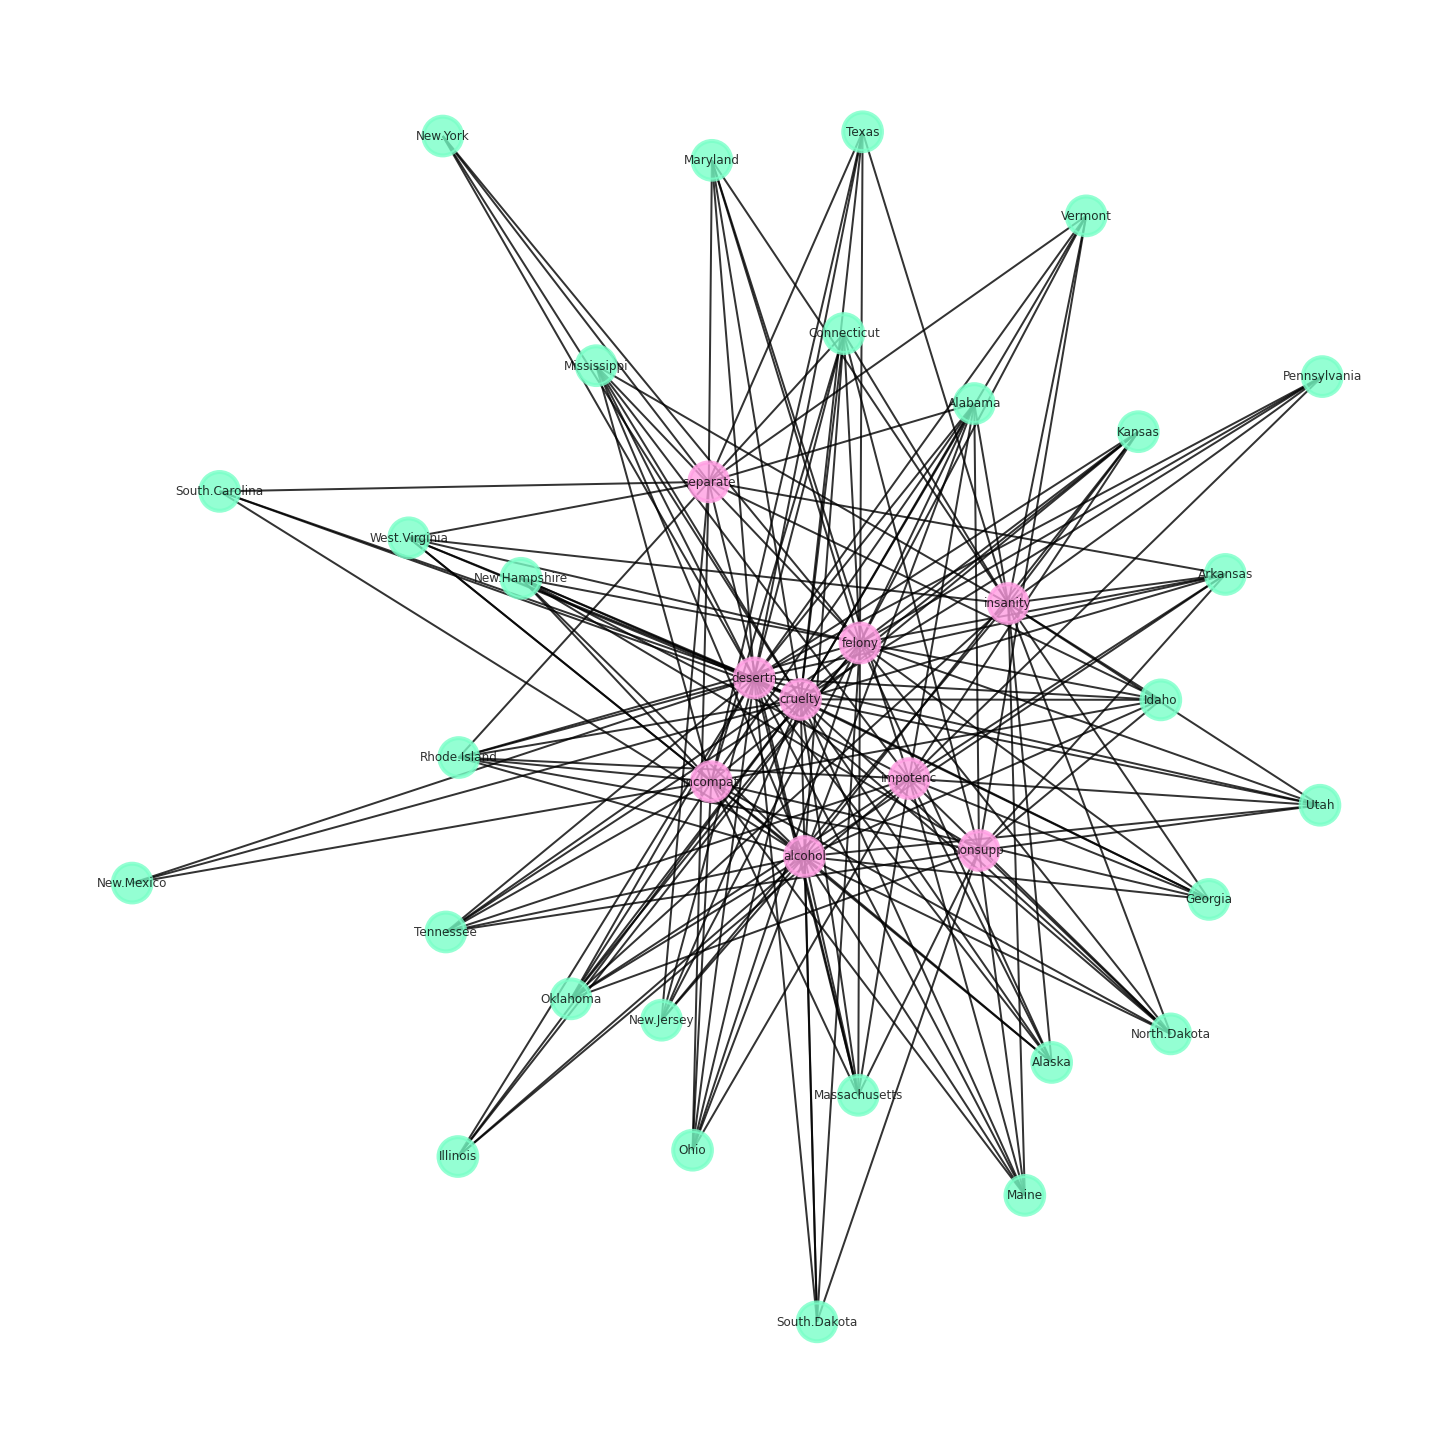

In [27]:
#Let's find out the most connected node of the graph
causes_cent=sorted(nx.bipartite.degree_centrality(divorce,causes).items() , key=lambda x: x[1], reverse=True)
print(causes_cent[18])

#Create a filtered for only connections three away from incompatibiity 
incomp_G=nx.ego_graph(divorce, 'incompat', radius=2)
plt.figure(figsize=(20, 20))
nodes_family={0:'#7affc8',1:'#ff9ee2'}
nodes_colors=[nodes_family[i[1]] for i in incomp_G.nodes.data('bipartite')]

nx.draw(incomp_G,with_labels=True,node_size=1500,node_shape="o" ,alpha=0.8 ,linewidths=4, width=2,node_color=nodes_colors)
plt.show()

### Identifying shared laws

For our peak into the incompability network, we can see a tight clique around five other divorce causes covered by laws. Incompability is the most common cause in the majority of the fifty states; however, its appears there is a trend of certain causes combined together. Impotentcy, non-suportive, alcohol, felony , desertion and cruelty shown to be the most frequently combined causes in the network. It is not a uncommon in the divorce court for the end of marriage that multitude of reason take in a part. This clique can also spot states with the same types of divorce.  For identification of this clique, we can create a new reduced netowrk where the network is based on the connection of the alcohol cause.

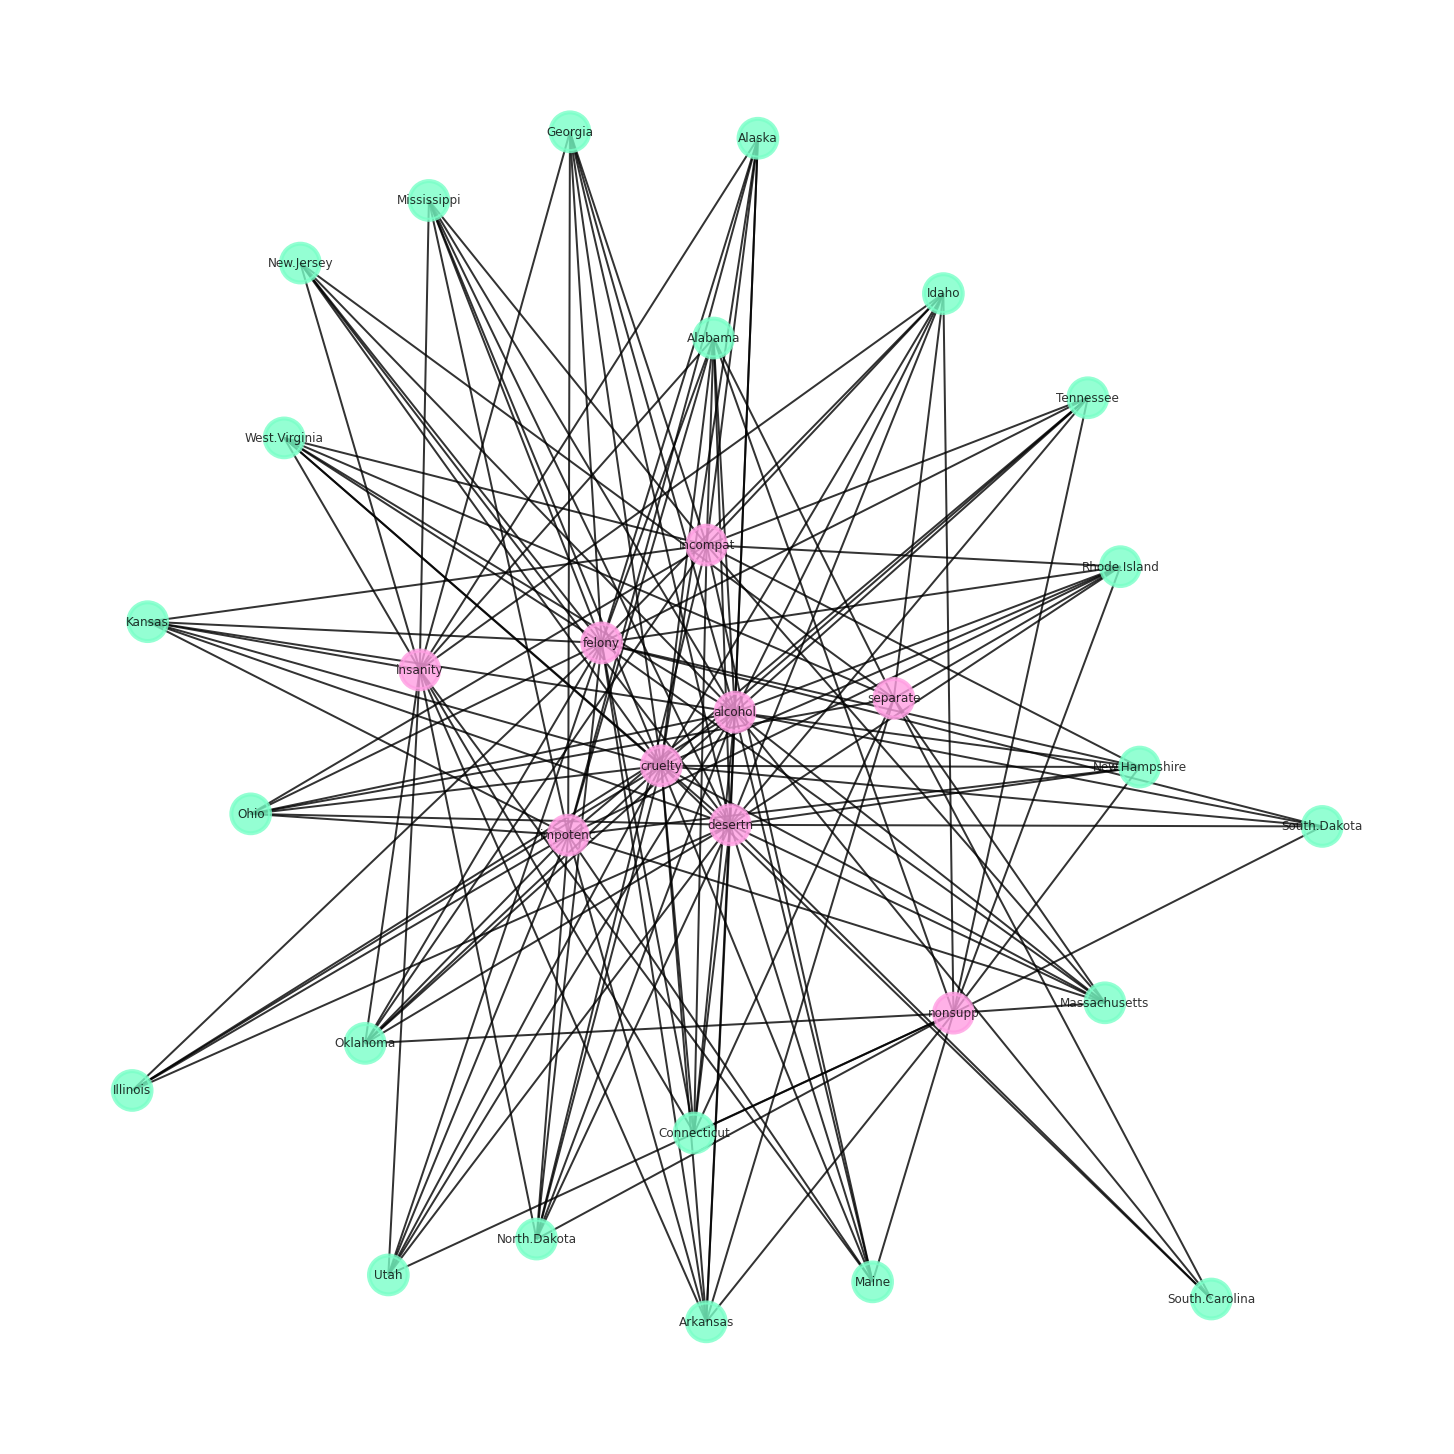

In [29]:
#identifying the clique in the incompability network
alcohol_G=nx.ego_graph(incomp_G, 'alcohol', radius=2)
plt.figure(figsize=(20, 20))
nodes_family={0:'#7affc8',1:'#ff9ee2'}
nodes_colors=[nodes_family[i[1]] for i in alcohol_G.nodes.data('bipartite')]

nx.draw(alcohol_G,with_labels=True,node_size=1500,node_shape="o" ,alpha=0.8 ,linewidths=4, width=2,node_color=nodes_colors)
plt.show()


### Possible theme with regions

We can now see the dense clique formed around the five causes. We can infer these states involved in the network share the same divorce laws. Currently, we cannot see a trend with the regions involved. We can break out this network by each cause for a clue of how a region can be affected. 